In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from util.ZigZag import ZigZag, ZigZag0
from util.CalcReturns import CalcReturns
from util.BuildData import TrainingSet_ML_Prices,  TrainingSet_ML_Logret

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

test_set_size = 1024


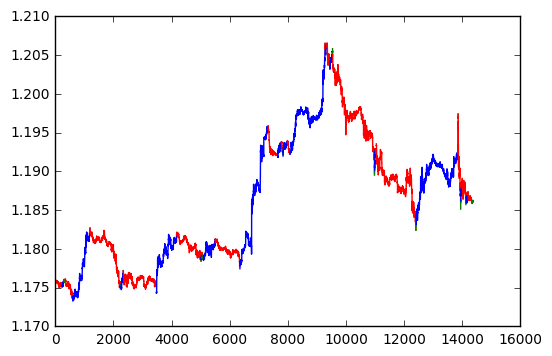

Buys: 6034; Sells: 8094; Holds: 239; Count: 14367


In [2]:
source = pd.read_csv('EURUSD1.csv', header=0)
prices = np.array(source.Close)

T, S = TrainingSet_ML_Prices(prices = prices, minsize = 0.0004, lag = 4*60, scale = True, ZigZagFunc = ZigZag0)

X_train = T['input'][:-test_set_size]
Y_train = T['label'][:-test_set_size]

X_test = T['input'][-test_set_size:]
Y_test = T['label'][-test_set_size:]

In [17]:
#clf = svm.SVC(kernel="poly", C=0.0001, degree=6, coef0=0.0001)
#clf = RandomForestClassifier(n_estimators = 100, criterion='entropy') # 
#clf = ExtraTreesClassifier(n_estimators = 4*60, oob_score = True, bootstrap = True)
#clf = ExtraTreesClassifier(n_estimators = 100)
#clf = DecisionTreeClassifier() # 53% !!!!!
#clf = AdaBoostClassifier(learning_rate = 0.6, n_estimators = 100) #
#clf = GradientBoostingClassifier(n_estimators = 100, learning_rate=1.01) # ~ 66% !!!!!!!!
#clf = BaggingClassifier() 
#clf = KNeighborsClassifier(n_neighbors=100, algorithm='brute') # 
#clf = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=100)) # 
clf = BaggingClassifier(base_estimator = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1)) 

#clf0 = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.1) # 
#clf1 = KNeighborsClassifier(n_neighbors=100, algorithm='brute') # 

#clf = VotingClassifier(estimators=[('gbc', clf0),('knc', clf1)], voting='soft')

clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [18]:
correct_count  = 0.0

test_buy  = 0.0
test_sell = 0.0
test_hold = 0.0

correct_buy  = 0.0
correct_sell = 0.0
correct_hold = 0.0

incorrect_buy  = 0.0
incorrect_sell = 0.0
incorrect_hold = 0.0

p = clf.predict(X_test)
c = Y_test

for i in range(0, test_set_size):
    
    if c[i] == 1:
        test_buy += 1.0;
    elif c[i] == 0:
        test_hold += 1.0;
    elif c[i] == -1:
        test_sell += 1.0;
    
    if p[i] == c[i]:
        correct_count += 1.0
        
        if c[i] == 1:
            correct_buy += 1.0;
        elif c[i] == 0:
            correct_hold += 1.0;
        elif c[i] == -1:
            correct_sell += 1.0;

    else:        
        if c[i] == 1:
            incorrect_buy += 1.0;
        elif c[i] == 0:
            incorrect_hold += 1.0;
        elif c[i] == -1:
            incorrect_sell += 1.0;            

print( "Accuracy:  ", (correct_count/test_set_size)*100.00 )

print( "Test buy:  ", test_buy  )
print( "Test sell: ", test_sell )
print( "Test hold: ", test_hold )

print( "Correct buy:  ", correct_buy,  "Incorrect buy:  ", incorrect_buy,  "Accuracy: ", (correct_buy/(test_buy if test_buy > 0 else 1))*100 )
print( "Correct sell: ", correct_sell, "Incorrect sell: ", incorrect_sell, "Accuracy: ", (correct_sell/(test_sell if test_sell > 0 else 1))*100 )
print( "Correct hold: ", correct_hold, "Incorrect hold: ", incorrect_hold, "Accuracy: ", (correct_hold/(test_hold if test_hold > 0 else 1))*100 )


('Accuracy:  ', 48.2421875)
('Test buy:  ', 615.0)
('Test sell: ', 359.0)
('Test hold: ', 50.0)
('Correct buy:  ', 228.0, 'Incorrect buy:  ', 387.0, 'Accuracy: ', 37.073170731707314)
('Correct sell: ', 266.0, 'Incorrect sell: ', 93.0, 'Accuracy: ', 74.09470752089136)
('Correct hold: ', 0.0, 'Incorrect hold: ', 50.0, 'Accuracy: ', 0.0)


In [5]:
%matplotlib


fig, ax = plt.subplots()
ax.plot(X_train[0], color = 'red')
#ax.plot(S.inverse_transform(X_train[0]), color = 'blue')

plt.show()


Using matplotlib backend: TkAgg
